# In this project, we are going to perform exploratory data analysis on the IMDB data set containing information about 5043 movies published between 1916 and 2016. Also, we will carry out a few hypotheses tests to check whether they are supported by the data. This followed by providing some actionable recommendations based on the analyses conducted.

We're presented with a situation where we are employed as a data scientist at SussexBudgetProductions. The last movie produced by the company of a budget of 500K got failed at the box office and only grossed 100K. So to keep the production company in the business, the next film needs to make money. The CEO thinks they can persuade investors to give 1.5 million in funding over the next year but needs to ensure a good return. Therefore, they have asked us to analyze the data in IMDB and provide some recommendations that can be implemented.

As a first step, import all the necessary libraries to run the analysis. Once libraries are imported, we will load the dataset, get some general info, and view a summary of its contents. Next, will identify problems and determine actions, and then the analysis will begin. 

In [1]:
#Importing the relevant libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Loading dataset
imdb_data = pd.read_csv("C:/Users/Meenakshi/Downloads/movie_metadata.csv")

In [2]:
#Checking data features

#retrieve the dimension of data
imdb_data.shape

(5043, 28)

In [3]:
#get the names of the columns
list(imdb_data)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [4]:
#internal structure of data
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [5]:
#number of missing observations
imdb_data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
#summarise data
imdb_data.describe(include='all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


As a second step, will prepare the data for exploratory analysis. We will start data cleaning by checking for and dropping duplicates. Then will first drop the null entries and only keep columns that are needed for analysis as the dataset is a bit large with 28 columns. And lastly, create a variable 'profit' which is required to know the potential of gross earnings of the company.

In [7]:
#Data preparation and cleaning

#drop duplicates
imdb_data.drop_duplicates(inplace=True)
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
color                        4979 non-null object
director_name                4895 non-null object
num_critic_for_reviews       4949 non-null float64
duration                     4983 non-null float64
director_facebook_likes      4895 non-null float64
actor_3_facebook_likes       4975 non-null float64
actor_2_name                 4985 non-null object
actor_1_facebook_likes       4991 non-null float64
gross                        4124 non-null float64
genres                       4998 non-null object
actor_1_name                 4991 non-null object
movie_title                  4998 non-null object
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
actor_3_name                 4975 non-null object
facenumber_in_poster         4985 non-null float64
plot_keywords                4846 non-null object
movie_imdb_link              4998 non-

In [8]:
#drop rows containing missing values in genres, gross and budget
imdb_data.dropna(subset=['genres'], inplace=True)  
imdb_data.dropna(subset=['gross'], inplace=True) 
imdb_data.dropna(subset=['budget'], inplace=True)  
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3857 entries, 0 to 5042
Data columns (total 28 columns):
color                        3855 non-null object
director_name                3857 non-null object
num_critic_for_reviews       3856 non-null float64
duration                     3856 non-null float64
director_facebook_likes      3857 non-null float64
actor_3_facebook_likes       3847 non-null float64
actor_2_name                 3852 non-null object
actor_1_facebook_likes       3854 non-null float64
gross                        3857 non-null float64
genres                       3857 non-null object
actor_1_name                 3854 non-null object
movie_title                  3857 non-null object
num_voted_users              3857 non-null int64
cast_total_facebook_likes    3857 non-null int64
actor_3_name                 3847 non-null object
facenumber_in_poster         3851 non-null float64
plot_keywords                3826 non-null object
movie_imdb_link              3857 non-

In [9]:
#create variable profit
imdb_data ['profit'] = imdb_data['gross'] - imdb_data['budget']
imdb_data.shape

(3857, 29)

In [10]:
#only keep columns that are needed for further analysis using movie title as index
imdb_data_1 = imdb_data[['imdb_score','budget','gross','movie_title', 'genres','profit','title_year','movie_facebook_likes','duration','language']]
imdb_data_1.head()

,imdb_score,budget,gross,movie_title,genres,profit,title_year,movie_facebook_likes,duration,language
0,7.9,237000000.0,760505847.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,523505847.0,2009.0,33000,178.0,English
1,7.1,300000000.0,309404152.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,9404152.0,2007.0,0,169.0,English
2,6.8,245000000.0,200074175.0,Spectre,Action|Adventure|Thriller,-44925825.0,2015.0,85000,148.0,English
3,8.5,250000000.0,448130642.0,The Dark Knight Rises,Action|Thriller,198130642.0,2012.0,164000,164.0,English
5,6.6,263700000.0,73058679.0,John Carter,Action|Adventure|Sci-Fi,-190641321.0,2012.0,24000,132.0,English


Now, the data is ready for exploratory analysis. 
Here we sort the mean imdb score and budget across films by genre. Will set a minimum imdb score and filter according to that. We are interested only in high scores so we are only looking at films with good ratings. Also, To examine if any of these good film genres can be made within our budget, I filtered by a maximum 15000 000 and looked at the gross return.

In [11]:
genreseries=imdb_data_1.groupby('genres')['imdb_score','budget','gross','profit'].mean()

#set the minimum imdb score that I care about to 8
min_imdb_score=8 
top_rated_genre = genreseries[genreseries['imdb_score']>min_imdb_score]
top_rated_genre = top_rated_genre.sort_values('imdb_score', ascending=False)

#print the genres for inspection
top_rated_genre.head()

,imdb_score,budget,gross,profit
genres,,,,
Adventure|Animation|Drama|Family|Musical,8.5,4.500000e+07,422783777.0,3.777838e+08
Crime|Drama|Fantasy|Mystery,8.5,6.000000e+07,136801374.0,7.680137e+07
Action|Adventure|Drama|Fantasy|War,8.4,1.802615e+07,6498000.0,-1.152815e+07
Adventure|Animation|Fantasy,8.4,2.400000e+09,2298191.0,-2.397702e+09
Adventure|Drama|Thriller|War,8.4,1.400000e+07,11433134.0,-2.566866e+06


In [12]:
#set the maximum possible budget to 15000 000
max_budget = 15000000
topgenreseries = imdb_data_1.groupby('genres')['imdb_score','budget','gross','profit'].mean()

#find the details of films with less than the maximum budget
budget_genres = topgenreseries[topgenreseries['budget']<max_budget]
budget_genres = budget_genres.sort_values('imdb_score',ascending=False)
budget_genres.head(10)

,imdb_score,budget,gross,profit
genres,,,,
Adventure|Drama|Thriller|War,8.4,14000000.0,11433134.0,-2566866.0
Documentary|War,8.3,2000000.0,1430185.0,-569815.0
Documentary|Drama|Sport,8.3,700000.0,7830611.0,7130611.0
Drama|Fantasy|War,8.2,13500000.0,37623143.0,24123143.0
Drama|Mystery|War,8.2,6800000.0,6857096.0,57096.0
Biography|Crime|Documentary|History,8.2,1000000.0,484221.0,-515779.0
Biography|Crime|Drama|Western,8.1,6000000.0,102308900.0,96308900.0
Crime|Documentary|Drama,8.0,4000000.0,21244913.0,17244913.0
Biography|Drama|Family|Musical|Romance,8.0,8200000.0,163214286.0,155014286.0


Here, we can conclude that the Adventure|Drama|Thriller|War genre seems to be well-rated and within our budget.

In [13]:
imdb_data[imdb_data['genres']=='Adventure|Drama|Thriller|War']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
2970,Color,Wolfgang Petersen,96.0,293.0,249.0,18.0,Martin Semmelrogge,362.0,11433134.0,Adventure|Drama|Thriller|War,...,German,West Germany,R,14000000.0,1981.0,21.0,8.4,1.85,11000,-2566866.0


Now, will test pearson correlation coefficient hypotheses on few data variables to check whether they are supported by the data.

In [14]:
imdb_data_1.corr(method='pearson')

,imdb_score,budget,gross,profit,title_year,movie_facebook_likes,duration
imdb_score,1.000000,0.029407,0.212234,0.035862,-0.127715,0.280089,0.359345
budget,0.029407,1.000000,0.101033,-0.952768,0.044245,0.053296,0.068946
gross,0.212234,0.101033,1.000000,0.205884,0.044862,0.367425,0.249879
profit,0.035862,-0.952768,0.205884,1.000000,-0.029825,0.059739,0.008458
title_year,-0.127715,0.044245,0.044862,-0.029825,1.000000,0.293981,-0.129491
movie_facebook_likes,0.280089,0.053296,0.367425,0.059739,0.293981,1.000000,0.219550
duration,0.359345,0.068946,0.249879,0.008458,-0.129491,0.219550,1.000000


To see if there is any relationship between variables. I have used the correlation coefficient of pearson and displayed the results in the above table.
Moreover, I have displayed the correlation in a scatterplot for visualization.

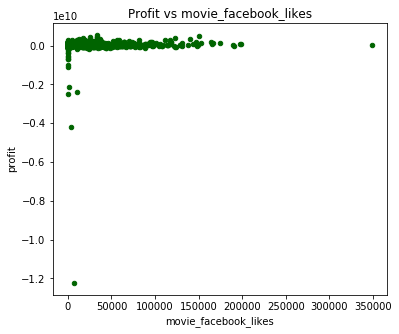

In [15]:
#H1. The best movies according to movie_facebook_likes return high profit and gross.
imdb_data_1.plot.scatter(x='movie_facebook_likes', y='profit',title='Profit vs movie_facebook_likes',color='DarkGreen',figsize=(6,5));

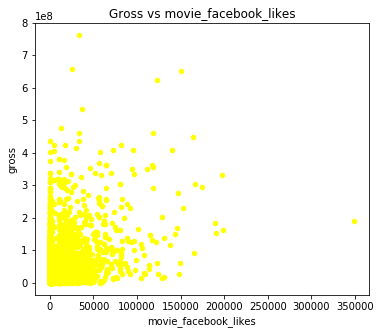

In [16]:
imdb_data_1.plot.scatter(x='movie_facebook_likes', y='gross',title='Gross vs movie_facebook_likes',color='yellow',figsize=(6,5));

Here, with the correlation coefficient of ~0.059739, there is no evidence of a strong positive linear relationship between profit vs movie_facebook_likes. But, if we look at the relationship of gross with movie_facebook_likes we find that the correlation is more evident in the data. We get a correlation coefficient for ~0.367425 for gross and popularity which demonstrates a moderate linear relationship.

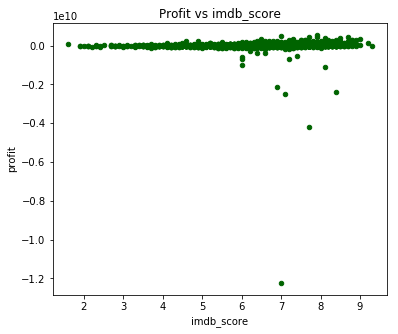

In [17]:
#H2. The best movies according to imdb_score return high profit and gross.
imdb_data_1.plot.scatter(x='imdb_score', y='profit',title='Profit vs imdb_score', color='DarkGreen', figsize=(6,5));

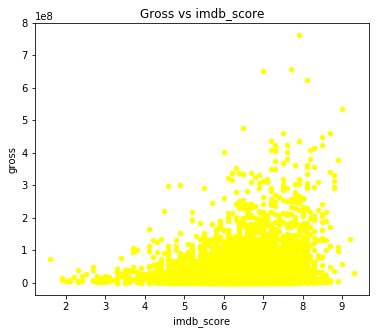

In [18]:
imdb_data_1.plot.scatter(x='imdb_score', y='gross',title='Gross vs imdb_score', color='Yellow', figsize=(6,5));

There is no linear relationship between profit and imdb_score (coefficient of ~0.035862). But the correlation coefficient between gross and imdb_score is ~0.212234. Here we have a mild linear relationship between gross and imdb_score.

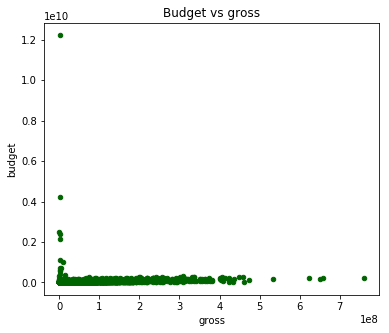

In [19]:
#H3. Highly budgeted movies return high gross and profit.
imdb_data_1.plot.scatter(x='gross', y='budget',title='Budget vs gross', color='DarkGreen', figsize=(6,5));

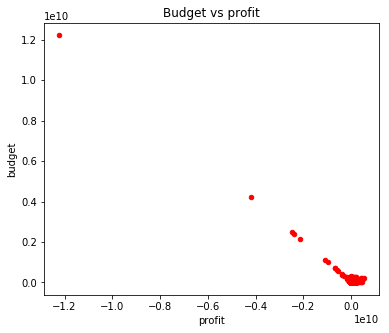

In [20]:
imdb_data_1.plot.scatter(x='profit', y='budget',title='Budget vs profit', color='red', figsize=(6,5));

For budget vs gross the correlation coefficient is ~0.101033 and shows there is no linear relationship between the variables. And budget vs profit indicates ~-0.95276 which indicates that there is a strong negative relationship between the variables. The relationship is negative because, as one variable increases, the other variable decreases.

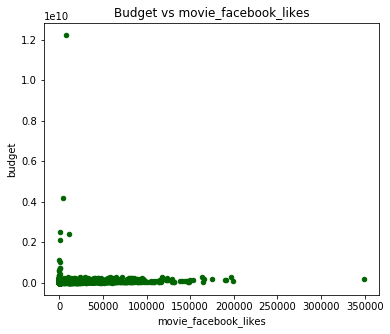

In [21]:
#H4. Highly budgeted movies have a high movie_facebook_likes.
imdb_data_1.plot.scatter(x='movie_facebook_likes', y='budget',title='Budget vs movie_facebook_likes', color='DarkGreen', figsize=(6,5));

Here, there is no linear relationship between budget and movie_facebook_likes (coefficient of ~0.053296). We can reject hypothesis 4. Only because a movie has a high budget does not mean that it will receive high facebook likes.

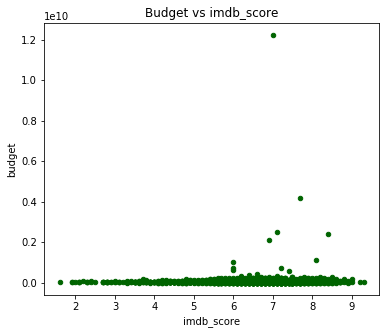

In [22]:
#H5. Highly budgeted movies have a high imdb_score.
imdb_data_1.plot.scatter(x='imdb_score', y='budget',title='Budget vs imdb_score', color='DarkGreen', figsize=(6,5));

Similarly, as earlier hypotheses, there is no linear relationship between budget and imdb_score (coefficient of ~0.029407). We can reject hypothesis 5. Only because a movie has a high budget does not mean that it will receive high imdb_score.

Going forward with analysis, we will split genres and group movies by genres. Examining the data more, let's see if we can find any interesting statistics and observations.

In [23]:
# Split genres and create a new entry for each of the genre a movie falls into
s = imdb_data_1['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del imdb_data_1['genres']
imdb_data_1_split_genres = imdb_data_1.join(s)
imdb_data_1_split_genres

,imdb_score,budget,gross,movie_title,profit,title_year,movie_facebook_likes,duration,language,genres
0,7.9,237000000.0,760505847.0,Avatar,523505847.0,2009.0,33000,178.0,English,Action
0,7.9,237000000.0,760505847.0,Avatar,523505847.0,2009.0,33000,178.0,English,Adventure
0,7.9,237000000.0,760505847.0,Avatar,523505847.0,2009.0,33000,178.0,English,Fantasy
0,7.9,237000000.0,760505847.0,Avatar,523505847.0,2009.0,33000,178.0,English,Sci-Fi
1,7.1,300000000.0,309404152.0,Pirates of the Caribbean: At World's End,9404152.0,2007.0,0,169.0,English,Action
1,7.1,300000000.0,309404152.0,Pirates of the Caribbean: At World's End,9404152.0,2007.0,0,169.0,English,Adventure
1,7.1,300000000.0,309404152.0,Pirates of the Caribbean: At World's End,9404152.0,2007.0,0,169.0,English,Fantasy
2,6.8,245000000.0,200074175.0,Spectre,-44925825.0,2015.0,85000,148.0,English,Action
2,6.8,245000000.0,200074175.0,Spectre,-44925825.0,2015.0,85000,148.0,English,Adventure
2,6.8,245000000.0,200074175.0,Spectre,-44925825.0,2015.0,85000,148.0,English,Thriller


In [24]:
# Group movies by genre using title as unique identifier and display all genres.
imdb_data_1_genre = (pd.DataFrame(imdb_data_1_split_genres.groupby('genres').movie_title.nunique())).sort_values('movie_title', ascending=True)

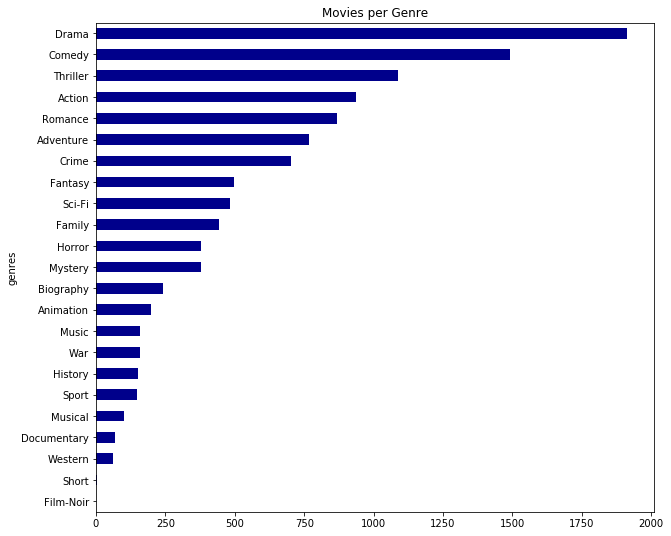

In [25]:
# Display in bar chart
imdb_data_1_genre['movie_title'].plot.barh(title = 'Movies per Genre',color='DarkBlue', figsize=(10, 9));

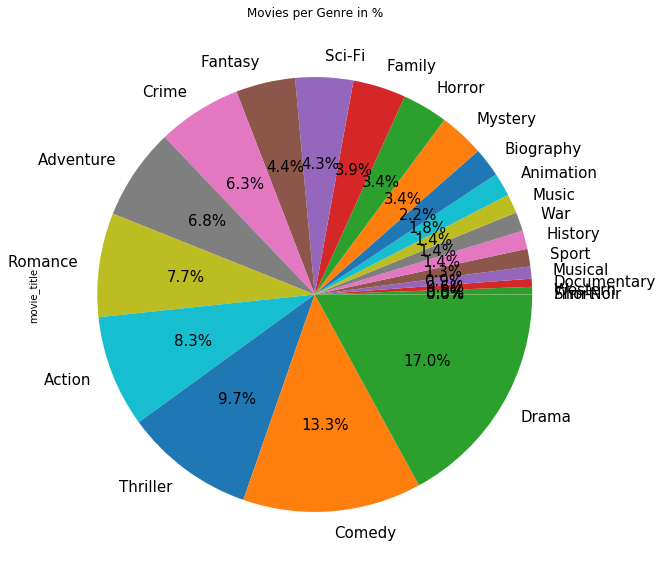

In [26]:
imdb_data_1_genre['movie_title'].plot.pie(title= 'Movies per Genre in %', figsize=(10,10), autopct='%1.1f%%',fontsize=15);

From this, we can see that most of our data that is most of the movies are based on the Drama genre by 17%.

In [27]:
#Get movies with highest budget
imdb_data_1.nlargest(5, 'budget')

,imdb_score,budget,gross,movie_title,profit,title_year,movie_facebook_likes,duration,language
2988,7.0,1.221550e+10,2201412.0,The Host,-1.221330e+10,2006.0,7000,110.0,Korean
3859,7.7,4.200000e+09,211667.0,Lady Vengeance,-4.199788e+09,2005.0,4000,112.0,Korean
3005,7.1,2.500000e+09,195888.0,Fateless,-2.499804e+09,2005.0,607,134.0,Hungarian
2323,8.4,2.400000e+09,2298191.0,Princess Mononoke,-2.397702e+09,1997.0,11000,134.0,Japanese
2334,6.9,2.127520e+09,410388.0,Steamboy,-2.127110e+09,2004.0,973,103.0,Japanese


'The Host' movie shows the highest budget.

In [28]:
#Get movies with highest profit
imdb_data_1.nlargest(5, 'profit')

,imdb_score,budget,gross,movie_title,profit,title_year,movie_facebook_likes,duration,language
0,7.9,237000000.0,760505847.0,Avatar,523505847.0,2009.0,33000,178.0,English
29,7.0,150000000.0,652177271.0,Jurassic World,502177271.0,2015.0,150000,124.0,English
26,7.7,200000000.0,658672302.0,Titanic,458672302.0,1997.0,26000,194.0,English
3024,8.7,11000000.0,460935665.0,Star Wars: Episode IV - A New Hope,449935665.0,1977.0,33000,125.0,English
3080,7.9,10500000.0,434949459.0,E.T. the Extra-Terrestrial,424449459.0,1982.0,34000,120.0,English


'Avatar' movie made highest profit.

In [29]:
#Get movies with highest imdb_score
imdb_data_1.nlargest(3, 'imdb_score')

,imdb_score,budget,gross,movie_title,profit,title_year,movie_facebook_likes,duration,language
1937,9.3,25000000.0,28341469.0,The Shawshank Redemption,3341469.0,1994.0,108000,142.0,English
3466,9.2,6000000.0,134821952.0,The Godfather,128821952.0,1972.0,43000,175.0,English
66,9.0,185000000.0,533316061.0,The Dark Knight,348316061.0,2008.0,37000,152.0,English


'The Shawshank Redemption' received highest imdb_score.

# Summary

In the process of preparing a great deal of data, modeling it, displaying it in a number of graphs, and interpreting it, it was possible to conduct an analysis of movies published between 1916 and 2016.

1- I examined that the Adventure|Drama|Thriller|War genre seems to be well-rated and within our budget.

2- From hypotheses, we can conclude that movies with high gross have higher movie_facebook_likes and imdb_score. However, these relations are merely correlations and do not imply causation.

3- Most of the movies are based on the Drama genre by 17%

4- Also, we can conclude with respect to genre that, (Top 5 in terms of budget, profit and imdb_score)
For high budget, Comedy|Drama|Horror|Sci-Fi 
For high profit, Action|Adventure|Fantasy|Sci-Fi 
For high imdb_score, Crime|Drama 

Reference- https://www.kaggle.com/lorenzhering/movie-data-analysis/notebook